In [1]:
from pathlib import Path
from glob import glob

In [79]:
# import kent library
import sys
sys.path.insert(0, '/data/critt/shared/Spring19/')

import kent
import importlib
importlib.reload(kent)

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<module 'kent' from '/data/critt/shared/Spring19/kent.py'>

In [37]:
from nltk import word_tokenize

In [53]:
cwd = Path(".")

In [54]:
spanish_dir = cwd.absolute()/"spanish_billion_words"

In [64]:
files = spanish_dir.glob("*")

In [66]:
%%time
spanish_freq_dic = {}
for file in files:
    spanish_freq_dic = create_freq_dic(file, spanish_freq_dic)
    print(f"Processed file: {file.name}")

Total No. of keys = 186253
Highest freq = 794607
Processed file: spanish_billion_words_08
Total No. of keys = 226642
Highest freq = 2599564
Processed file: spanish_billion_words_45
Total No. of keys = 393725
Highest freq = 3426701
Processed file: spanish_billion_words_03
Total No. of keys = 455136
Highest freq = 4426033
Processed file: spanish_billion_words_23
Total No. of keys = 495200
Highest freq = 5720378
Processed file: spanish_billion_words_16
Total No. of keys = 556796
Highest freq = 6775445
Processed file: spanish_billion_words_34
Total No. of keys = 597447
Highest freq = 7831020
Processed file: spanish_billion_words_27
Total No. of keys = 622832
Highest freq = 8827559
Processed file: spanish_billion_words_11
Total No. of keys = 725627
Highest freq = 9650056
Processed file: spanish_billion_words_77
Total No. of keys = 739172
Highest freq = 11431511
Processed file: spanish_billion_words_44
Total No. of keys = 827921
Highest freq = 12239149
Processed file: spanish_billion_words_9

Total No. of keys = 3075522
Highest freq = 94543793
Processed file: spanish_billion_words_26
Total No. of keys = 3085344
Highest freq = 95631716
Processed file: spanish_billion_words_38
Total No. of keys = 3089393
Highest freq = 97475147
Processed file: spanish_billion_words_57
Total No. of keys = 3098834
Highest freq = 98552417
Processed file: spanish_billion_words_39
Total No. of keys = 3111896
Highest freq = 99366053
Processed file: spanish_billion_words_89
Total No. of keys = 3120994
Highest freq = 100413631
Processed file: spanish_billion_words_31
Total No. of keys = 3152876
Highest freq = 101213228
Processed file: spanish_billion_words_94
Total No. of keys = 3161863
Highest freq = 102301072
Processed file: spanish_billion_words_41
Total No. of keys = 3189301
Highest freq = 103146782
Processed file: spanish_billion_words_70
Total No. of keys = 3220352
Highest freq = 104614934
Processed file: spanish_billion_words_17
Total No. of keys = 3225296
Highest freq = 106422658
Processed fi

In [58]:
def create_freq_dic(posix_path, dic=spanish_freq_dic):
    if posix_path.is_file():
        with posix_path.open("r") as file:
            for line in file:
                for word in word_tokenize(line):
                    word = word.lower()
                    if dic.get(word):
                        dic[word] = dic[word] + 1
                    else:
                        dic[word] = 1
    print(f"Total No. of keys = {len(dic.keys())}\nHighest freq = {max(dic.values())}")
    return dic

In [67]:
len(spanish_freq_dic.keys())

3225296

In [68]:
max(spanish_freq_dic.values())

106422658

In [65]:
len(spanish_freq_dic.keys())

186253

In [131]:
import json
english_dic = open('english_freq.json','r').read()
english_freq_dic = json.loads(english_dic)

In [133]:
len(english_freq_dic)

604205

In [144]:
filtered_english_freq_dic = dict(filter(lambda item: item[0].isalpha(),english_freq_dic.items()))
filtered_english_freq_dic = dict(filter(lambda item: item[1] > 10,filtered_english_freq_dic.items()))

In [145]:
len(filtered_english_freq_dic)

84848

In [172]:
sorted_filtered_english_freq_dic = sorted(filtered_english_freq_dic.items(),key= lambda x:x[1], reverse=True)

In [147]:
sorted_filtered_english_freq_dic

[('catlin', 11),
 ('heartedly', 11),
 ('mauritanians', 11),
 ('thadeus', 11),
 ('hatim', 11),
 ('ghabin', 11),
 ('tazmamert', 11),
 ('burgin', 11),
 ('burckhardt', 11),
 ('frailer', 11),
 ('wurzburg', 11),
 ('juvenilia', 11),
 ('maquettes', 11),
 ('scuola', 11),
 ('magnanimously', 11),
 ('laziest', 11),
 ('elusiveness', 11),
 ('stijl', 11),
 ('pechstein', 11),
 ('delilah', 11),
 ('consigns', 11),
 ('metempsychosis', 11),
 ('unredeemed', 11),
 ('untalented', 11),
 ('pities', 11),
 ('showplace', 11),
 ('generalises', 11),
 ('tactlessness', 11),
 ('fatalist', 11),
 ('duffers', 11),
 ('unattractiveness', 11),
 ('distrusts', 11),
 ('fernanda', 11),
 ('godot', 11),
 ('wasserman', 11),
 ('exeunt', 11),
 ('imperator', 11),
 ('commonweal', 11),
 ('wonted', 11),
 ('clucks', 11),
 ('sincerest', 11),
 ('stigmatise', 11),
 ('constabularies', 11),
 ('philbin', 11),
 ('preceptory', 11),
 ('inscribing', 11),
 ('pira', 11),
 ('lemass', 11),
 ('subventions', 11),
 ('interdenominational', 11),
 ('hologra

In [70]:
import json
spanish_freq_json = json.dumps(spanish_freq_dic)
f = open('spanish_freq.json','w')
f.write(spanish_freq_json)
f.close()

In [71]:
# Creates a frequency dictionary with key as the lenght of the string and value as a list of key:value containing word:frequency
# It eliminates the numerical, alphanumerical and special characters containing strings
import re
def create_freq_dic(dic):
    new_dic = dict()
    new_dic.setdefault(1,dict())
    for key in dic.keys():
        l = len(key)
        #if l> 20:
            #print(str(key) + "   " + str(dic[key]))
        #new_dic.setdefault(l,dict())
        pattern = r"[a-zA-Z]{"+str(l)+"}"
        is_alpha = re.fullmatch(pattern, key)
        if l == 1: 
            continue
        else:
            if is_alpha:
                try:
                    new_dic[l][key] = dic[key]
                except KeyError as er:
                    new_dic.setdefault(l,dict())
                    new_dic[l][key] = dic[key]
    return new_dic  

In [72]:
spanish_len_freq_dic = create_freq_dic(spanish_freq_dic)

In [75]:
spanish_len_freq_dic.keys()

dict_keys([1, 3, 6, 2, 10, 5, 7, 11, 13, 9, 4, 12, 8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 25, 23, 30, 28, 48, 49, 45, 54, 29, 35, 27, 32, 42, 34, 46, 38, 43, 33, 31, 58, 44, 37, 36, 39, 40, 84, 41, 52, 50, 65, 55, 67, 64, 139, 71, 69, 72, 59, 83, 47, 53, 57, 85, 70, 60, 86, 56, 94, 82, 61, 198, 167])

In [97]:
spanish_len_freq_dic.get(7)

{'viernes': 134077,
 'marines': 4590,
 'militar': 223793,
 'agredir': 2950,
 'llevaba': 33804,
 'chicago': 28871,
 'socorro': 29686,
 'mundial': 563131,
 'impedir': 52303,
 'entrada': 158005,
 'quieren': 56770,
 'ligadas': 4181,
 'huyendo': 4823,
 'refugio': 23947,
 'somalia': 34675,
 'medidas': 733430,
 'alcance': 88640,
 'citando': 5419,
 'oficial': 261196,
 'reuters': 8470,
 'captada': 835,
 'fuentes': 190736,
 'buscado': 9523,
 'blancas': 20704,
 'general': 1521624,
 'fuerzas': 251898,
 'arropan': 173,
 'hombres': 256430,
 'defensa': 214820,
 'afganas': 4529,
 'mohamed': 14790,
 'palauan': 2,
 'deponer': 1286,
 'produjo': 77500,
 'europea': 460529,
 'mantuvo': 60158,
 'spiegel': 1218,
 'policia': 1062,
 'alemana': 53429,
 'huellas': 11054,
 'ataques': 80879,
 'revista': 106679,
 'pesetas': 67001,
 'hacerlo': 83154,
 'federal': 231151,
 'suponer': 15197,
 'condena': 47041,
 'francia': 239217,
 'estados': 1518007,
 'escrito': 105303,
 'maligno': 2089,
 'heridos': 52768,
 'ninguno': 4

In [90]:
def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

def find_levenstine_word_list(word,new_freq_dic,lev_dist=1):
    word = word.lower()
    # Stores all the words of same levinstine distance as the target word
    word_list = []
    
    # If target_word is stop word, return empty list
    #if word in stop_words:
       # return word_list
    l = len(word)
    
    # return for target length word = 1
    if l == 1: 
        return word_list
    
    # Find lev_dist for words in length of target word
    d = new_freq_dic[l]
    for w in list(d.keys()):
        if d[w] > 10:
            lev = levenshtein(word,str(w))
            if lev == lev_dist:
                word_list.append(w)
    # Find lev_dist for words in length-1 of target word
    d = new_freq_dic[l-1]
    for w in list(d.keys()):
        # Ignore words with frequency < 10, as they may be typos
        if d[w] > 10:
            lev = levenshtein(word,str(w))
            if lev == lev_dist:
                word_list.append(w)
    
    # Find lev_dist for words in length+1 of target word
    d = new_freq_dic[l+1]
    for w in list(d.keys()):
        if d[w] > 10:
            lev = levenshtein(word,str(w))
            if lev == lev_dist:
                word_list.append(w)
        
    return word_list

In [91]:
find_levenstine_word_list("killings", spanish_len_freq_dic)

['billings', 'gillings', 'kallings', 'killing']

In [92]:
# read the ENJA study data
stdf = kent.readTPDDBtables(['ENJA15/Tables/'], "*st", path='/data/critt/tprdb/TPRDB/')
source_words = list(set(stdf['SToken'].tolist()))

In [203]:
len(source_words)

433

In [204]:
import json
f = open('spanish_lev1_dic.json','w')
f.write(json.dumps(word_lev_dic_spanish))
f.close()

In [199]:
#word_lev_dic_spanish = {}
for w in source_words:
    lev = find_levenstine_word_list(w, spanish_len_dic)
    print(f"{w} -- {lev}")
    word_lev_dic_spanish[w] = lev
    

what -- ['that', 'chat', 'wham', 'khat', 'ghat', 'whit', 'nhat', 'bhat', 'phat', 'hat', 'wat', 'wha', 'wheat', 'whats']
negative -- ['negativa', 'negativo']
people -- ['peuple', 'peoples']
responded -- ['responder', 'responden', 'respondes', 'responde']
International -- ['internationale', 'internationaal', 'internationals']
sure -- ['sube', 'surf', 'dure', 'supe', 'jure', 'cure', 'sume', 'eure', 'pure', 'iure', 'suri', 'sire', 'sura', 'lure', 'kure', 'suse', 'sare', 'sere', 'aure', 'gure', 'suze', 'bure', 'sule', 'suge', 'suru', 'sore', 'mure', 'ture', 'surt', 'suro', 'sune', 'suke', 'sude', 'surp', 'oure', 'suce', 'nure', 'suae', 'sury', 'sur', 'sue', 'ure', 'sre', 'sufre', 'surge', 'sucre', 'surte', 'sture', 'squre', 'sudre', 'shure', 'soure', 'suren', 'sures', 'surje']
bears -- ['years', 'tears', 'beats', 'sears', 'beard', 'beers', 'gears', 'bearn', 'beans', 'fears', 'mears', 'wears', 'beals', 'pears', 'beara', 'hears', 'beaus', 'beurs', 'behrs', 'dears', 'beams', 'beart', 'beare', 

included -- ['includes', 'include']
four -- ['tour', 'your', 'pour', 'hour', 'cour', 'jour', 'sour', 'nour', 'foul', 'dour', 'foer', 'zour', 'fouz', 'lour', 'bour', 'fous', 'for', 'our', 'fur', 'fou', 'flour', 'fours']
cost -- ['cosa', 'post', 'lost', 'most', 'host', 'coso', 'colt', 'cast', 'coss', 'cosp', 'cort', 'jost', 'cose', 'cosy', 'coat', 'cont', 'cest', 'tost', 'cout', 'fost', 'dost', 'yost', 'cosi', 'gost', 'oost', 'comt', 'rost', 'cott', 'kost', 'cosc', 'coit', 'bost', 'chst', 'coot', 'cosm', 'cos', 'ost', 'cot', 'cst', 'costa', 'costo', 'coste', 'coast', 'costs', 'const', 'costi']
resources -- ['resource', 'ressources']
hit -- ['oit', 'hot', 'hip', 'mit', 'bit', 'his', 'kit', 'hat', 'het', 'uit', 'lit', 'sit', 'hiv', 'dit', 'him', 'pit', 'cit', 'nit', 'fit', 'ait', 'hut', 'vit', 'hrt', 'wit', 'hic', 'git', 'hin', 'tit', 'hid', 'iit', 'jit', 'rit', 'hib', 'hil', 'hie', 'hii', 'hij', 'hst', 'hht', 'hiu', 'hir', 'hdt', 'eit', 'hix', 'zit', 'hig', 'hbt', 'hia', 'htt', 'hio', 'hc

In -- ['ii', 'if', 'ir', 'iv', 'on', 'id', 'cn', 'it', 'is', 'an', 'il', 'ix', 'iu', 'ip', 'ic', 'im', 'ia', 'ie', 'rn', 'ib', 'nn', 'fn', 'io', 'mn', 'tn', 'ig', 'gn', 'kn', 'pn', 'sn', 'dn', 'xn', 'ik', 'bn', 'ij', 'ln', 'iq', 'zn', 'iz', 'jn', 'vn', 'hn', 'ih', 'yn', 'iw', 'wn', 'qn', 'iy', 'bin', 'inc', 'min', 'ine', 'ibn', 'int', 'ian', 'rin', 'inf', 'inn', 'ing', 'ion', 'jin', 'din', 'lin', 'ins', 'pin', 'ain', 'ein', 'nin', 'tin', 'win', 'ign', 'inm', 'ipn', 'ind', 'ini', 'ina', 'vin', 'qin', 'yin', 'gin', 'isn', 'kin', 'inb', 'imn', 'idn', 'ino', 'ink', 'iin', 'xin', 'cin', 'hin', 'zin', 'inu', 'ien', 'irn', 'inv', 'inp', 'iun', 'icn', 'inh', 'itn', 'inr', 'ifn', 'uin', 'ihn', 'inl']
Greek -- ['green', 'creek', 'greer', 'greed', 'greet', 'geek', 'gree', 'reek', 'greeks']
settled -- ['settler', 'settle']
found -- ['sound', 'round', 'pound', 'bound', 'hound', 'mound', 'fouad', 'wound', 'fould', 'fund', 'fond']
response -- ['responde', 'responso', 'responsa', 'respons', 'responses

Auguste -- ['augusto', 'augusta', 'augusti', 'august', 'augustea', 'augusteo']
each -- ['bach', 'mach', 'nach', 'zach', 'sach', 'fach', 'etch', 'uach', 'esch', 'hach', 'euch', 'exch', 'pach', 'eich', 'dach', 'kach', 'jach', 'tach', 'lach', 'wach', 'yach', 'rach', 'eaco', 'ech', 'ach', 'eac', 'eah', 'beach', 'reach', 'peach', 'leach', 'teach', 'keach', 'eyach']
such -- ['much', 'sich', 'auch', 'sach', 'duch', 'buch', 'puch', 'suck', 'ruch', 'euch', 'suco', 'sucu', 'luch', 'succ', 'ouch', 'subh', 'sech', 'kuch', 'huch', 'suce', 'suca', 'sucs', 'sch', 'suh', 'suc', 'uch', 'suchi', 'suche', 'sucht', 'sutch', 'sucha']
30 -- []
emphasizing -- []
warranted -- []
have -- ['nave', 'dave', 'save', 'wave', 'cave', 'hale', 'hare', 'hate', 'rave', 'gave', 'haye', 'haze', 'lave', 'hove', 'hase', 'habe', 'hame', 'pave', 'hage', 'hive', 'hava', 'havo', 'hade', 'iave', 'mave', 'havn', 'hake', 'hane', 'haxe', 'fave', 'haie', 'jave', 'ave', 'hae', 'hav', 'haven', 'havre', 'havel', 'haver', 'chave', 'huav

customs -- ['custom', 'custos']
insistence -- ['insistente']
mile -- ['mide', 'mike', 'file', 'mire', 'mill', 'mole', 'mine', 'milk', 'milo', 'mili', 'dile', 'mila', 'mise', 'male', 'mime', 'nile', 'mixe', 'mice', 'mule', 'milf', 'milt', 'aile', 'mite', 'vile', 'mlle', 'pile', 'mild', 'mele', 'tile', 'bile', 'sile', 'mily', 'mije', 'xile', 'mils', 'wile', 'kile', 'zile', 'cile', 'mil', 'ile', 'mie', 'mle', 'miles', 'miley', 'emile', 'smile', 'mille', 'milne', 'miele', 'miler', 'milde', 'milet', 'mileo', 'meile', 'milke']
by -- ['br', 'be', 'my', 'ay', 'ba', 'bo', 'bp', 'bi', 'bm', 'bc', 'ny', 'bb', 'bs', 'bv', 'bt', 'cy', 'bu', 'bg', 'bd', 'bf', 'ty', 'bk', 'ey', 'bn', 'py', 'uy', 'xy', 'bh', 'oy', 'ry', 'bl', 'sy', 'ky', 'ly', 'bw', 'bq', 'bx', 'bj', 'gy', 'vy', 'yy', 'bz', 'hy', 'dy', 'fy', 'wy', 'jy', 'iy', 'zy', 'qy', 'bay', 'boy', 'buy', 'bye', 'bey', 'aby', 'byu', 'byd', 'byh', 'pby', 'bry', 'bly', 'byn', 'dby', 'bny', 'byl', 'sby', 'byo', 'lby', 'eby', 'byg']
flaring -- ['flamin

increasing -- []
gatherer -- ['gathered']
mitigation -- ['litigation']
term -- ['team', 'tere', 'tera', 'perm', 'terc', 'teri', 'tero', 'tert', 'teru', 'herm', 'teem', 'turm', 'terr', 'germ', 'tern', 'terz', 'ferm', 'serm', 'ters', 'ter', 'tem', 'erm', 'trm', 'terme', 'terms', 'termo', 'terma', 'terim', 'xterm']
warned -- ['warner', 'warped', 'warnes', 'earned', 'larned', 'warne']
Some -- ['tome', 'home', 'come', 'same', 'sume', 'rome', 'dome', 'sole', 'soma', 'nome', 'sobe', 'somo', 'kome', 'soke', 'soms', 'seme', 'sore', 'fome', 'syme', 'gome', 'sime', 'sone', 'ssme', 'sope', 'lome', 'sode', 'aome', 'soie', 'som', 'sme', 'soe', 'ome', 'somme', 'asome', 'somet', 'somex']
he -- ['ce', 'ue', 'te', 'ee', 've', 'fe', 'be', 're', 'we', 'hu', 'hd', 'ne', 'hp', 'pe', 'je', 'ho', 'hb', 'hr', 'hi', 'ge', 'hc', 'ie', 'hz', 'ke', 'hg', 'hs', 'ye', 'hl', 'ae', 'hh', 'ze', 'qe', 'hf', 'hk', 'hm', 'oe', 'xe', 'ht', 'hv', 'hq', 'hn', 'hy', 'hw', 'hx', 'hj', 'che', 'she', 'het', 'her', 'hey', 'hee', 

times -- ['nimes', 'dimes', 'limes', 'temes', 'tomes', 'timeo', 'timer', 'timos', 'tides', 'tires', 'tiles', 'vimes', 'timex', 'rimes', 'timea', 'pimes', 'himes', 'timss', 'timas', 'tames', 'timms', 'tines', 'tibes', 'timed', 'simes', 'gimes', 'time', 'ties', 'imes', 'timers']
giving -- ['living', 'diving']
has -- ['mas', 'gas', 'hab', 'was', 'das', 'haz', 'vas', 'uas', 'hms', 'pas', 'cas', 'his', 'had', 'ras', 'sas', 'hat', 'hal', 'ham', 'nas', 'bas', 'tas', 'hrs', 'hai', 'fas', 'har', 'kas', 'ias', 'haq', 'hao', 'oas', 'zas', 'hap', 'haj', 'haw', 'aas', 'jas', 'hae', 'hus', 'hak', 'yas', 'eas', 'hau', 'hac', 'hes', 'hfs', 'hss', 'hos', 'hag', 'hhs', 'hps', 'haa', 'hds', 'hts', 'hbs', 'hks', 'hns', 'hav', 'hcs', 'hah', 'haf', 'hls', 'as', 'hs', 'hans', 'haas', 'hash', 'hays', 'haus', 'shas', 'chas', 'hals', 'hmas', 'hase', 'hass', 'hasi', 'hast', 'habs', 'hats', 'haes', 'hasa', 'hafs', 'hams', 'khas', 'ehas', 'thas', 'hasn', 'haps', 'haos']
policy -- ['police', 'polity', 'polic']
make

Developing -- []
Criminal -- ['kriminal', 'criminel', 'criminals', 'criminale']
old -- ['ola', 'cld', 'olp', 'ole', 'uld', 'pld', 'oli', 'odd', 'oid', 'nld', 'ojd', 'ord', 'osd', 'oud', 'olt', 'opd', 'omd', 'obd', 'ocd', 'tld', 'olo', 'ald', 'ood', 'ogd', 'ild', 'sld', 'eld', 'ond', 'mld', 'oed', 'dld', 'vld', 'qld', 'oly', 'lld', 'olm', 'olf', 'olu', 'oad', 'fld', 'hld', 'ols', 'bld', 'gld', 'oln', 'olg', 'ol', 'od', 'ld', 'gold', 'cold', 'hold', 'ould', 'told', 'bold', 'sold', 'oled', 'olid', 'fold', 'olds', 'olde', 'wold', 'mold', 'oldi']
poor -- ['peor', 'pour', 'pool', 'voor', 'door', 'noor', 'pooh', 'moor', 'loor', 'podr', 'poos', 'poon', 'pior', 'poir', 'poot', 'poer', 'coor', 'goor', 'poof', 'pook', 'boor', 'poop', 'poom', 'poo', 'oor', 'poors', 'pomor', 'spoor', 'ponor', 'poort']
receives -- ['received', 'receiver', 'receive', 'receivers']
wake -- ['lake', 'take', 'make', 'wade', 'jake', 'wave', 'waka', 'sake', 'ware', 'cake', 'fake', 'rake', 'waku', 'dake', 'wako', 'bake', 'w

over -- ['ever', 'oder', 'omer', 'oler', 'aver', 'tver', 'oper', 'oier', 'iver', 'ober', 'ofer', 'oven', 'vver', 'oker', 'oher', 'ovar', 'zver', 'oves', 'oter', 'oger', 'ver', 'ove', 'oer', 'mover', 'cover', 'rover', 'dover', 'lover', 'jover', 'overa', 'overo', 'bover', 'ovier', 'overs', 'hover', 'overy', 'olver']
further -- ['farther']
strangely -- []
keep -- ['deep', 'jeep', 'kemp', 'heep', 'keen', 'kees', 'peep', 'keel', 'beep', 'teep', 'kelp', 'ceep', 'seep', 'kiep', 'weep', 'veep', 'keef', 'qeep', 'ktep', 'keer', 'geep', 'kee', 'eep', 'kep', 'keeps']
achieving -- []
awareness -- []
some -- ['tome', 'home', 'come', 'same', 'sume', 'rome', 'dome', 'sole', 'soma', 'nome', 'sobe', 'somo', 'kome', 'soke', 'soms', 'seme', 'sore', 'fome', 'syme', 'gome', 'sime', 'sone', 'ssme', 'sope', 'lome', 'sode', 'aome', 'soie', 'som', 'sme', 'soe', 'ome', 'somme', 'asome', 'somet', 'somex']
from -- ['frob', 'frog', 'fram', 'prom', 'crom', 'brom', 'krom', 'grom', 'frou', 'drom', 'frum', 'flom', 'fro

In [99]:
len(word_lev_dic_spanish.keys())

69

In [113]:
len(spanish_freq_dic)

3225296

In [115]:
aa = {1:"debasish",2: "rahul"}

In [118]:
for item in aa.items():
    print(item)

(1, 'debasish')
(2, 'rahul')


In [182]:
spanish_freq = list(spanish_freq_dic.values())

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
type(spanish_freq)

dict_values

In [184]:
np.percentile(spanish_freq, 50)

2.0

In [186]:
import seaborn as sns

In [ ]:
sns.

In [185]:
np.median(list(spanish_freq))

2.0

(array([3.224035e+06, 6.690000e+02, 2.330000e+02, 1.240000e+02,
        5.900000e+01, 4.500000e+01, 2.400000e+01, 1.200000e+01,
        1.400000e+01, 1.300000e+01, 7.000000e+00, 7.000000e+00,
        4.000000e+00, 5.000000e+00, 4.000000e+00, 4.000000e+00,
        3.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

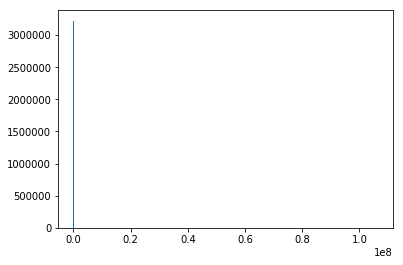

In [176]:
plt.hist(spanish_freq,bins=1000)

In [171]:
len(spanish_freq_dic)

3225296

In [187]:
filtered_spanish_dic = dict(filter(lambda x: x[1] > 20,spanish_freq_dic.items()))

In [188]:
len(filtered_spanish_dic)

364899

In [200]:
xx  = filter(lambda x: x[1] > 20,spanish_freq_dic.items())

In [190]:
 filtered_50_spanish = sorted(filtered_spanish_dic.items(),key = lambda x: x[1], reverse=True)

In [193]:
filtered_top_200_bottom_50_spanish = filtered_50_spanish[200:]

In [196]:
filtered_spanish_dic = dict(filtered_top_200_bottom_50_spanish)
spanish_len_dic = create_freq_dic(filtered_spanish_dic)

In [197]:
spanish_len_dic

{1: {},
 9: {'comunidad': 485915,
  'diciembre': 451959,
  'programas': 435772,
  'encuentra': 418825,
  'cualquier': 410015,
  'principal': 396967,
  'municipio': 361002,
  'capacidad': 350807,
  'problemas': 346321,
  'noviembre': 339754,
  'productos': 333577,
  'siguiente': 325487,
  'violencia': 269399,
  'objetivos': 268146,
  'temporada': 264462,
  'proyectos': 264442,
  'necesario': 256180,
  'necesidad': 255754,
  'propuesta': 250444,
  'provincia': 241536,
  'documento': 240646,
  'esfuerzos': 234676,
  'barcelona': 234553,
  'resultado': 229559,
  'argentina': 224357,
  'elementos': 219763,
  'principio': 219226,
  'actividad': 211150,
  'instituto': 205690,
  'respuesta': 199725,
  'directiva': 194032,
  'municipal': 193577,
  'alrededor': 185672,
  'gobiernos': 183603,
  'presencia': 181340,
  'francisco': 176545,
  'considera': 175140,
  'autoridad': 172265,
  'funciones': 160161,
  'oficiales': 158989,
  'generales': 158902,
  'ejecutivo': 157730,
  'localidad': 156196,


In [103]:
ss = spanish_len_freq_dic[5]

In [111]:
spanish_freq_dic['greer']

456

In [106]:
sorted_spanish_freq_dic = sorted(spanish_freq_dic.items(), key=lambda x: x[1], reverse=True)

In [107]:
sorted_spanish_freq_dic.

[('de', 106422658),
 ('digito', 102878230),
 ('la', 59552628),
 ('el', 43785130),
 ('en', 42673606),
 ('y', 36540584),
 ('que', 32162914),
 ('a', 28073255),
 ('los', 24905503),
 ('del', 19923392),
 ('las', 17640934),
 ('se', 15916951),
 ('por', 13069574),
 ('un', 12363889),
 ('con', 11936584),
 ('para', 11062301),
 ('una', 10266154),
 ('su', 8901223),
 ('al', 8039161),
 ('no', 7383635),
 ('es', 7185687),
 ('como', 5946885),
 ('más', 4337781),
 ('lo', 4078456),
 ('o', 3916364),
 ('sus', 3491605),
 ('sobre', 3481194),
 ('ha', 3421446),
 ('fue', 3027617),
 ('este', 2643713),
 ('entre', 2597136),
 ('también', 2396861),
 ('pero', 1972728),
 ('esta', 1940994),
 ('años', 1770983),
 ('sin', 1717094),
 ('dos', 1715714),
 ('son', 1701090),
 ('parte', 1701028),
 ('le', 1661189),
 ('han', 1615902),
 ('desde', 1541754),
 ('si', 1530818),
 ('general', 1521624),
 ('estados', 1518007),
 ('ser', 1483096),
 ('está', 1442358),
 ('ya', 1421240),
 ('estado', 1386103),
 ('hasta', 1384111),
 ('e', 1376557),
